# EDA를 통한 데이터의 형태, 문장길이, 데이터 수, 결측치 등을 파악

In [21]:
!pip install seaborn
!pip install pyarrow

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

# 데이터 구조 파악
![img](data_info1.png)

In [4]:
from datasets import load_from_disk
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

# Arrow 파일 경로 설정
train_file_path = os.path.join(parent_dir, 'data', 'shuffled_dataset')
test_file_path = os.path.join(parent_dir, 'data', 'test_dataset')
dataset = load_from_disk(train_file_path)
test_dataset=load_from_disk(test_file_path)

In [5]:
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset=test_dataset['validation']

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)
test_df=pd.DataFrame(test_dataset)

print(f"Train length : {len(train_df)}")
print(f"Valid length : {len(valid_df)}")
print(f"Test length : {len(test_df)}")

Train length : 5547
Valid length : 617
Test length : 600


## 데이터의 형태

In [6]:
train_dataset[0]

{'title': '도당굿',
 'context': "경기도에서 연행되는 굿의 한 가지로 일명 대동굿·치성굿이라고 하는데 매년 음력 10월 상달 추수 후 마을이 무사하고 잘 되기를 도당대감(都堂大監) 삼불제석(三佛帝釋)에게 비는 굿이 도당굿이다. 경기도 지역에서 마을의 으뜸신[都神]을 모신 당인 도당(都堂)에서 지내는 마을굿. 별칭으로는 ‘고창굿’이라 부르는 지역도 있다. 옛 시흥군 소래면 포리(浦里, 현 인천시 남동구)를 비롯해 장봉섬, 사섬, 떼무리섬 등 다수의 지역에서 정월에 행해졌으나, 음력 3월 3일과 10월 10일에 도당굿이 치러지는 사례도 흔히 찾아볼 수 있어 일정하지 않다. \\n\\n인천·부천 등 경기도 남부지방에서 세습무가 주관하는 도당굿 절차 및 진행과정을 보면, 굿은 마을의 신당이나 신목(神木)이 있는 근처에 차일을 치고 굿당을 꾸며 행하게 되는데, 맨 먼저 무당은 부정굿으로 굿당을 깨끗이 정화한다. 부정굿이 끝나면 마을의 당(堂)으로 도당신을 모시러 가는 ‘도당모시기’를 한다. 이처럼 마을의 안녕을 위해서 굿판을 벌여 치성과 제사를 지내는 것을 도당굿, 대동굿, 별신굿으로 불리고 있다.\\n\\n마을의 주민 가운데 한 사람에게 대를 내려 도당신이 강림한 것을 확인하는 ‘대내림’이 행하여진다. 전생과 현세의 삶과 수행을 귀하게 여기듯 티베트 불교(라마교)에서 전생과 현세의 불국(佛國, 관음의 정토)과 나라를 동일시하며 달라이라마를 관음의 '대내림' 화신이라고 생각하는 것과 비슷하다. 이어서 굿패는 ‘돌돌이’를 하는데 이것은 무당패들이 마을의 우물·장승·집 등을 무악을 울리면서 한바퀴 도는 것으로, 도당신의 영력으로 잡귀를 몰아내고 마을 전체를 정화시킨다는 의미를 가진다.\\n\\n굿당에 돌아와서는 당금애기신화가 구송되고 바라춤을 추는 ‘제석굿’을 하고, ‘본향굿’에서 도당할머니·도당할아버지를 모신 뒤 손굿(또는 손님굿)에서 천연두신인 손님을 청하여 마을에 질병이 돌지 않기를 기원한다.\\n\\n다음에 잡귀를 쫓아내는 군웅굿을 한 뒤, 굿을

In [7]:
valid_dataset[0]

{'title': None,
 'context': '제1차 그리스-페르시아 전쟁\n기원전 493년까지 마지막까지 남은 반란군도 페르시아의 함대에 의해 괴멸되었고 페르시아는 이 기회로 에게해 동쪽의 섬들까지 제국의 판도를 넓혀갔다. 다리우스는 반란이 진압된 후 밀레토스에서는 신전을 약탈하고 주민은 모두 노예로 만들거나 강제로 이주시켰지만 나머지 반란 도시들은 놀랍게도 하나도 건드리지 않았다. 그는 사위인 마르도니오스를 이 지역의 총독으로 임명해 뒷처리를 맡겼는데 지역별로 공평한 세금을 부과하고 민주주의도 전부는 아니지만 일부 부활시켰고 죄인들을 각자 자기 고향도시로 돌아가도록 하였다. 다리우스 1세의 이러한 유화책은 그리스 본토에 대한 일종의 선전으로 보인다.\n\n기원전 492년 봄 엄청난 대군이 마르도니오스의 지휘 아래 그리스 원정에 나섰다. 해군은 에게해 해안의 해안국가들을 휩쓸었고 육군은 헬레스폰토스 해협을 건너 트라케와 마케도니아로 진군해 들어가서 복속시켰다. 그러나 아토스 산에서 페르시아 해군 선단은 폭풍을 만나 몰살했는데 헤로도토스에 따르면 300척의 배가 침몰하고 20,000명의 병사가 목숨을 잃었다고 한다. 마르도니오스는 남은 군대를 소아시아로 퇴각시켰다. 트라케의 부족인 브리간스는 퇴각하는 페르시아 군을 맞아 격렬하게 저항하여 마드로니우스에게 부상까지 입혔는데 결국 항복했다. 마르도니오스에 의한 이 원정이 과연 그리스 침공이었느냐에 대해서는 논란이 있다. 헤로도토스는 아테나이를 공격하기 위해서 라고 말하고 있지만 일단 트라케와 마케도니아를 다시 정복하여 이오니아 반란의 싹을 잘랐다는 점에서 더 이상의 진군이 필요했는가에 대한 의문이 있다.',
 'question': '기원전 492년 봄 그리스 원정을 지휘한 인물은 누구인가?',
 'answers': {'answer_start': [197], 'text': ['마르도니오스']},
 'document_id': 10764}

In [8]:
test_dataset[0]

{'question': "유령'은 어느 행성에서 지구로 왔는가?", 'id': 'mrc-1-000653'}

## context, question, answer에 대한 각각의 길이를 계산하여 추가

In [9]:
# 'answers_text' 열 추가
train_df['answers_text'] = train_df['answers'].apply(lambda x: x['text'][0])
# 'answers_text' 열 추가
valid_df['answers_text'] = valid_df['answers'].apply(lambda x: x['text'][0])

In [10]:
train_df['con_len'] = train_df['context'].apply(len)
train_df['qu_len'] = train_df['question'].apply(len)
train_df['ans_len'] = train_df['answers_text'].apply(len)


valid_df['con_len'] = valid_df['context'].apply(len)
valid_df['qu_len'] = valid_df['question'].apply(len)
valid_df['ans_len'] = valid_df['answers_text'].apply(len)


test_df['qu_len'] = test_df['question'].apply(len)

In [11]:
train_df.head()

,title,context,question,answers,document_id,answers_text,con_len,qu_len,ans_len
0,도당굿,경기도에서 연행되는 굿의 한 가지로 일명 대동굿·치성굿이라고 하는데 매년 음력 10...,대내림'을 행한 뒤 다음 순서는?,"{'answer_start': [715], 'text': ['‘돌돌이’']}",37217,‘돌돌이’,1053,18,5
1,겨울 폭풍 작전,"독일 공군에 의한 보급품 공수 작전이 실패로 끝나자, 포위된 독일 제6군이 구원의 ...",돈 집단군에서 가장 크고 강력한 부대는 어디인가?,"{'answer_start': [278], 'text': ['독일 제6군']}",53052,독일 제6군,1198,27,6
2,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,"{'answer_start': [616], 'text': ['뉴저지']}",37764,뉴저지,643,14,3
3,수천부정,"태종의 서손자로, 아버지는 태종의 열한번째 서자이자 유복자이며 선빈 안씨(善嬪 安氏...",수천부정에 봉작된 인물은?,"{'answer_start': [264], 'text': ['이정은']}",50359,이정은,949,14,3
4,긴 평화,긴 평화(Long Peace)는 그 전례가 없는 1945년 제2차 세계 대전의 종전...,냉전 이후 여러 분야에서 상대적 발전을 지속한 시대를 일컫는 용어는?,"{'answer_start': [259], 'text': ['""새로운 평화(New ...",52295,"""새로운 평화(New Peace)""",1304,38,19


In [12]:
valid_df.head()

,title,context,question,answers,document_id,answers_text,con_len,qu_len,ans_len
0,None,제1차 그리스-페르시아 전쟁\n기원전 493년까지 마지막까지 남은 반란군도 페르시아...,기원전 492년 봄 그리스 원정을 지휘한 인물은 누구인가?,"{'answer_start': [197], 'text': ['마르도니오스']}",10764,마르도니오스,794,32,6
1,등자 논제,화이트는 19세기 독일 역사학자 하인리히 브루너의 연구를 전범으로 삼았다. 브루너는...,프랑크인 기수가 기병창을 사용하기 위해 접목시킨 것은 무엇을 탄생시켰나?,"{'answer_start': [561], 'text': ['무장 기마병으로서의 중...",47799,무장 기마병으로서의 중세 봉건계급,608,40,18
2,전북 현대 모터스 2006 시즌,"최강희 감독은 울산에서 최성국, 이천수 등에 밀려 벤치 신세였던 김형범과 카르로스(...",중국 기자들은 누구의 이름을 본떠 최강희의 별명을 지어주었나요?,"{'answer_start': [989], 'text': ['청나라 시대의 강희제']}",45253,청나라 시대의 강희제,1164,35,11
3,2016년 뉴욕 및 뉴저지 폭탄 테러,9월 17일 밤 8시 30분 (현지 시간 ) 미국 뉴욕주 맨해튼의 첼시에서 발생한 ...,뉴욕에서 폭발이 일어났을 당시 폭발이 발생했다는 사실을 알린 사람은 누구였나?,"{'answer_start': [87], 'text': ['J. 피터 도널드']}",44268,J. 피터 도널드,1093,43,9
4,헨리 모건소,초기 윌슨의 성원자로서 모건소는 자신이 내각 수준의 직위로 임명될 것을 취하였으나 ...,헨리 모건소가 오스카 스트라우스와 같은 직위를 받은 것은 몇 년인가?,"{'answer_start': [470], 'text': ['1913년']}",19964,1913년,1786,38,5


In [13]:
test_df.head()

,question,id,qu_len
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653,21
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113,31
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191,39
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951,36
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272,26


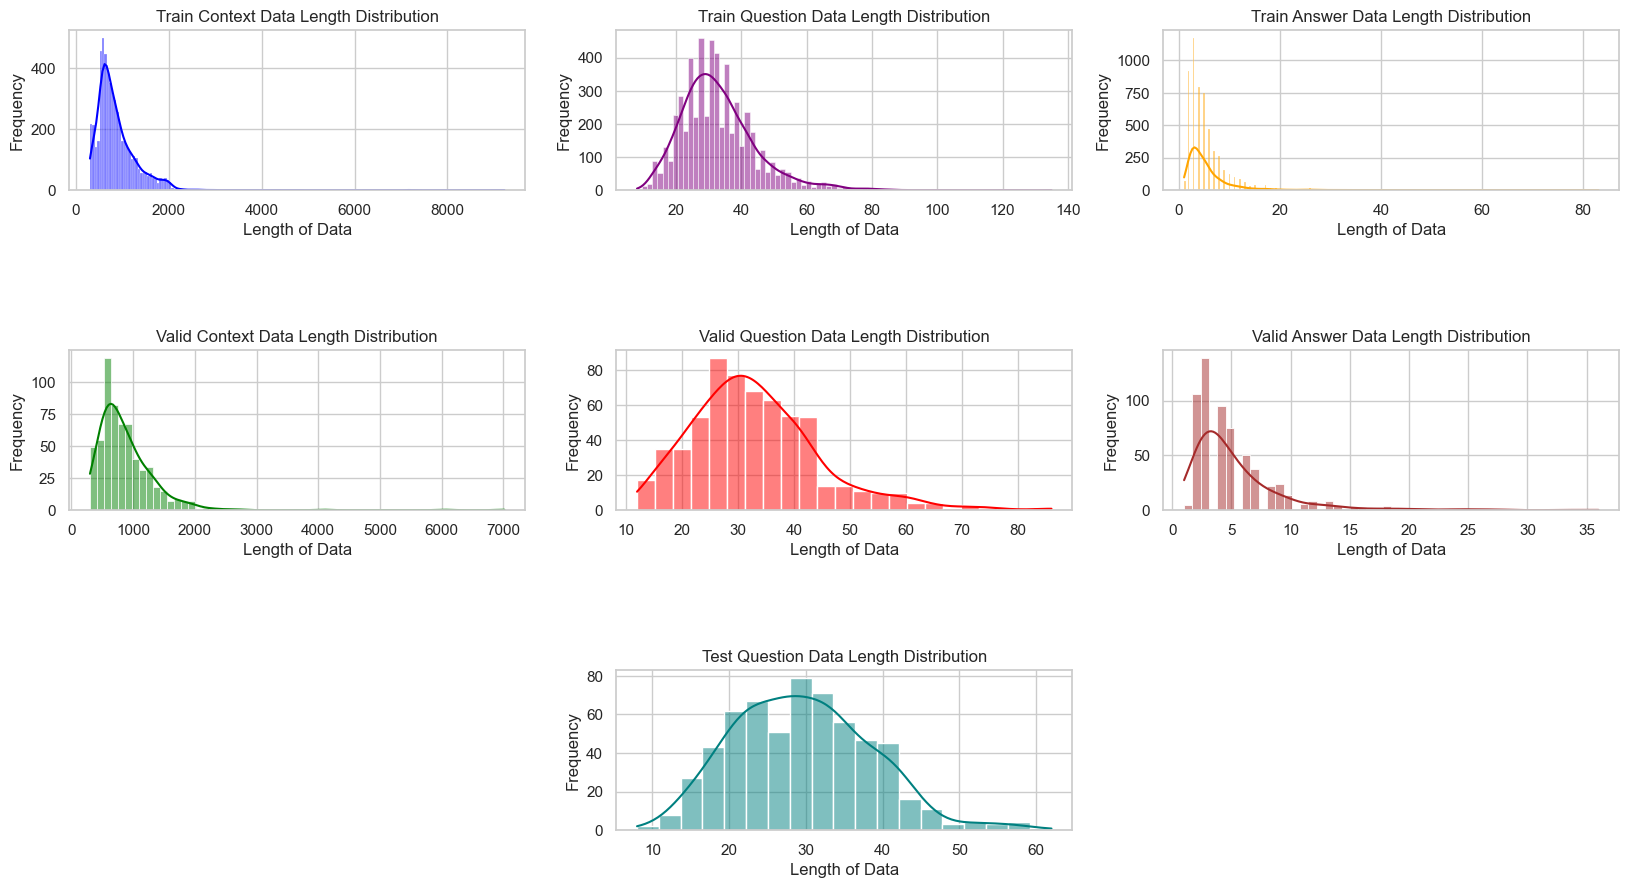

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정 (seaborn 기본 스타일 적용)
sns.set_theme(style="whitegrid")

# 그래프 크기 조정
plt.figure(figsize=(20, 10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

# 1. Train Context Data
plt.subplot(3, 3, 1)
sns.histplot(train_df["con_len"], kde=True, color='blue')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Train Context Data Length Distribution")

# 2. Train Question Data
plt.subplot(3, 3, 2)
sns.histplot(train_df["qu_len"], kde=True, color='purple')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Train Question Data Length Distribution")

# 3. Train Answer Data
plt.subplot(3, 3, 3)
sns.histplot(train_df["ans_len"], kde=True, color='orange')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Train Answer Data Length Distribution")

# 4. Valid Context Data
plt.subplot(3, 3, 4)
sns.histplot(valid_df["con_len"], kde=True, color='green')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Valid Context Data Length Distribution")

# 5. Valid Question Data
plt.subplot(3, 3, 5)
sns.histplot(valid_df["qu_len"], kde=True, color='red')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Valid Question Data Length Distribution")

# 6. Valid Answer Data
plt.subplot(3, 3, 6)
sns.histplot(valid_df["ans_len"], kde=True, color='brown')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Valid Answer Data Length Distribution")

# 7. Test Question Data
plt.subplot(3, 3, 8)
sns.histplot(test_df["qu_len"], kde=True, color='teal')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Test Question Data Length Distribution")

plt.show()


In [15]:
# todo ans outlier check

## train, test, validation의 각각 con, question, ans의 길이 비교


In [16]:
# 각 데이터셋의 con_len, qu_len, ans_len을 합치기
combined_df = pd.DataFrame({
    'train_con_len': train_df["con_len"],
    'train_qu_len': train_df["qu_len"],
    'train_ans_len': train_df["ans_len"],
    'valid_con_len': valid_df["con_len"],
    'valid_qu_len': valid_df["qu_len"],
    'valid_ans_len': valid_df["ans_len"],
    'test_qu_len': test_df["qu_len"]
})

In [17]:
display(combined_df[["train_con_len","valid_con_len"]].describe())
display(combined_df[["train_qu_len","valid_qu_len","test_qu_len"]].describe())
display(combined_df[["train_ans_len","valid_ans_len"]].describe())

,train_con_len,valid_con_len
count,5547.000000,617.000000
mean,864.144943,879.175041
std,469.751184,523.134644
min,301.000000,302.000000
25%,578.000000,566.000000
50%,746.000000,767.000000
75%,1036.500000,1056.000000
max,9227.000000,7016.000000


,train_qu_len,valid_qu_len,test_qu_len
count,5547.000000,617.000000,600.000000
mean,32.875969,33.058347,29.555000
std,11.745488,11.537481,8.962376
min,8.000000,12.000000,8.000000
25%,25.000000,25.000000,23.000000
50%,31.000000,32.000000,29.000000
75%,39.000000,39.000000,35.000000
max,135.000000,86.000000,62.000000


,train_ans_len,valid_ans_len
count,5547.000000,617.000000
mean,5.552911,5.346840
std,4.868543,4.233405
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,6.000000,6.000000
max,83.000000,36.000000


### train qusetion의 outlier가 좀 더 크다


## test_data의 question도 train,valid와 길이 거의 유사

#### 결측치 & 중복

In [114]:
# Train DataFrame 결측치 확인
print("Train DataFrame Missing Values:")
print(f"Context missing: {train_df['context'].isnull().sum()}")
print(f"Question missing: {train_df['question'].isnull().sum()}")
print(f"Answers missing: {train_df['answers_text'].isnull().sum()}")

# Valid DataFrame 결측치 확인
print("\nValid DataFrame Missing Values:")
print(f"Context missing: {valid_df['context'].isnull().sum()}")
print(f"Question missing: {valid_df['question'].isnull().sum()}")
print(f"Answers missing: {valid_df['answers_text'].isnull().sum()}")

# Test DataFrame 결측치 확인
print("\nTest DataFrame Missing Values:")
print(f"Question missing: {test_df['question'].isnull().sum()}")


Train DataFrame Missing Values:
Context missing: 0
Question missing: 0
Answers missing: 0

Valid DataFrame Missing Values:
Context missing: 0
Question missing: 0
Answers missing: 0

Test DataFrame Missing Values:
Question missing: 0


In [117]:
# Train DataFrame의 고유 값 개수 출력
print(f"Train DataFrame len: {len(train_df)}")
print(f"Unique contexts: {train_df['context'].nunique()}")
print(f"Unique questions: {train_df['question'].nunique()}")
print(f"Unique answers_text: {train_df['answers_text'].nunique()}")

# Valid DataFrame의 고유 값 개수 출력
print(f"\nValid DataFrame len: {len(valid_df)}")
print(f"Unique contexts: {valid_df['context'].nunique()}")
print(f"Unique questions: {valid_df['question'].nunique()}")
print(f"Unique answers_text: {valid_df['answers_text'].nunique()}")

# Test DataFrame의 고유 값 개수 출력 (answers는 없기 때문에 question만 계산)
print(f"\nTest DataFrame len: {len(test_df)}")
print(f"Unique questions: {test_df['question'].nunique()}")


Train DataFrame len: 3952
Unique contexts: 3340
Unique questions: 3952
Unique answers_text: 3622

Valid DataFrame len: 240
Unique contexts: 235
Unique questions: 240
Unique answers_text: 240

Test DataFrame len: 600
Unique questions: 600


### train set에서 유니크한 답변의 갯수가 적다?

In [127]:
# 중복된 'answers_text' 값을 가진 행들을 필터링하고, 'answers_text' 기준으로 정렬
duplicated_answers_text = train_df[train_df[['answers_text']].duplicated(keep=False)].sort_values('answers_text')

# 중복된 'answers_text' 값만 따로 추출 (중복된 값 리스트)
duplicated_values = train_df['answers_text'][train_df['answers_text'].duplicated()].unique()

# 중복된 값 출력
print("중복된 'answers_text' 값들:")
print(duplicated_values)

# 중복된 값을 포함한 모든 행 출력
display(duplicated_answers_text)


중복된 'answers_text' 값들:
['중국' '프랑스' '2004년' '화이트워터 사건' '일본' '1966년' '1578년' '이탈리아' '1962년'
 '포전 담당 책임제' '광동제약' '영국' '독일' '1945년' '미국' '2008년' '2015년' '1992년' '12년'
 '1995년' '북한' '윤보선' '1951년' '2006년' '3년' '1944년' '스페인' '2010년' '1916년'
 '히로시마 도요 카프' '1907년' '1990년' '다산 정약용' '현삼과' '1931년' '2017년' '러시아' '경찰'
 '상하이' '조선중앙일보' '교회' '3' '9월' '1919년' '근우회' '1948년' '1937년' '라틴어' '4개'
 '1927년' '1935년' '인도' '2007년' '2014년' '1999년' '발' '자장율사' '헤로인' '경원대군'
 '1982년' '2년' '인간' '명령형 프로그램' '영어' '8월 13일' '튜더 왕조 시대' '마오쩌둥' '일제시대'
 '공산주의' '5' '사슴' '1991년' '파리' '부산' '1946년' '율리우스 카이사르' '녹색' '홍준표' '이집트'
 '화살' '파즈르' '총리' '2005년' '병인박해' '동로마 황제 콘스탄스 2세' '여름' '마드리드' '《동아일보》'
 '레이프 에이릭손' '2001년' '이승만' '1994년' '학교' '1972년' '유금당' '근대철학' '알렉산드로스 대왕'
 '브뤼셀' '1978년' '제1기' '농업' '2012년' '남편' '사회주의' '페르시아' '1963년' '보리스 옐친 대통령'
 '정난정' '《황금어장 무릎팍도사》' '도널드 트럼프' '1975년' '1918년' '기독교' '14세기' '미드웨이 해전'
 '시베리아' '2016년' '러셀' '사형' '아일랜드' '스파르타' '1990년대' '일관' '수소' '제트팬이 설치된 종류식'
 '울릉도' '코끼리' '기병' '몽골' '노예제' '《어린이와 가정을 위한 이야기》' '네

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,answers_text,ans_len
534,팔라 제국,데바팔라 사후 팔라 제국은 점차 힘을 잃기 시작하였다. 데바팔라의 조카였던 비그라하...,라지야팔라의 통솔 기간은?,mrc-0-001011,"{'answer_start': [209], 'text': ['12년']}",35229,667,647,14,12년,3
806,하워드 마셜,그는 구두로는 안나 니콜 스미스에게 자신의 재산의 반을 주겠다고 약속했다 하나 유언...,하워드 마셜의 재산 상속을 위해 안나 니콜 스미스가 법정 소송을 벌인 기간은?,mrc-0-002386,"{'answer_start': [108], 'text': ['12년']}",36640,1564,619,43,12년,3
3831,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,우르바노 5세가 십자군동원을 명령한 연도는?,mrc-1-001198,"{'answer_start': [131], 'text': ['1362년']}",6773,784,1521,24,1362년,5
3181,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,우르바노 5세가 이태리 전역에 십자군 원정을 명령한 해는?,mrc-1-001750,"{'answer_start': [131], 'text': ['1362년']}",6773,1142,1521,32,1362년,5
2859,모르겐슈테른 (무기),모르겐슈테른(Morgenstern금성)은 중세 시대 무기의 하나이다. 영어명인 모닝...,모닝스타를 사용하기 시작한 시기는?,mrc-0-003745,"{'answer_start': [488], 'text': ['14세기']}",9139,2459,1020,19,14세기,4
...,...,...,...,...,...,...,...,...,...,...,...
110,빌 클린턴,클린턴의 첫 기간의 말기가 접근하면서 새로운 스캔들이 일어났다. 스캔들은 클린턴과 ...,클린턴의 두 번째 임기는 어떤 스캔들로 인해 내리막을 걷게 되었나?,mrc-0-004136,"{'answer_start': [257], 'text': ['화이트워터 사건']}",4633,2707,624,37,화이트워터 사건,8
3219,크레시 전투,프랑스군이 퇴각하자 잉글랜드군은 부상자 중에서 몸값을 받을 만한 사람을 추려냈다. ...,에드워드 3세가 프랑스에서 철수한 것은 무엇 때문인가?,mrc-0-000144,"{'answer_start': [453], 'text': ['흑사병']}",9059,88,564,30,흑사병,3
3891,팔레올로고스 왕조 치하의 비잔티움 제국,팔레올로고스 왕조 치하의 비잔티움 제국은 제4차 십자군 전쟁(1204년) 이후 건국...,튀르크인이 영토를 빼앗아갈 무렵 유행하던 전염병은?,mrc-1-000102,"{'answer_start': [627], 'text': ['흑사병']}",59729,63,970,28,흑사병,3
1164,1980년 일본 프로 야구 올스타전,전년도에 구단 창단 이래 첫 일본 시리즈 우승을 이끈 히로시마 도요 카프의 고바 다...,1979년 일본시리즈 우승팀은?,mrc-0-003978,"{'answer_start': [30], 'text': ['히로시마 도요 카프']}",41406,2608,619,17,히로시마 도요 카프,10


#### 큰 의미는 없이 우연히 겹치는걸로

In [399]:
train_df[train_df[['context']].duplicated(keep=False)].sort_values('context')

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
2181,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",시간이동' 에피소드의 다음 에피소드의 제목은 무엇인가?,mrc-1-000565,"{'answer_start': [234], 'text': ['거짓말']}",25858,368,650,30,3
2164,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",ABC에서 방영되는 '시간이동'의 장르는?,mrc-0-004810,"{'answer_start': [21], 'text': ['텔레비전 드라마']}",25858,3135,650,23,8
3408,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,사쿠라가 성장할 때 스피넬 선을 만든 이유는?,mrc-0-005352,"{'answer_start': [356], 'text': ['자신에게서 크로우 리드...",49888,3487,870,25,23
1350,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,에리오르에게는 효력이 없는 마법은?,mrc-0-005385,"{'answer_start': [120], 'text': ['달 속성의 마법']}",49888,3511,870,19,8
2353,하인리히 4세,1090년 교황 우르바노 2세의 주선으로 43세의 토스카나 여후작 마틸다가 결혼을 ...,마틸다와 결혼한 인물은?,mrc-0-002459,"{'answer_start': [81], 'text': ['벨프 5세']}",11195,1608,1214,13,5
...,...,...,...,...,...,...,...,...,...,...
1946,탐무즈,활달한 대지의 여신 이슈타르-인니나(이하 이슈타르)가 식물과 생명의 성장의 신인 자...,무엇이 이슈타르가 사랑한 대상을 죽음에 이르게 했나?,mrc-0-002377,"{'answer_start': [249], 'text': ['멧돼지']}",13012,1559,612,29,3
2743,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...",위표가 항우 쪽으로 돌아서는 계기가 된 발언을 한 인물은 누구인가?,mrc-1-000310,"{'answer_start': [252], 'text': ['허부']}",34137,204,990,37,2
2684,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...","본래, 한왕 측에서 팽성 대전에 참전했으나 한을 배신하고 항우의 편으로 넘어간 인물은?",mrc-0-002695,"{'answer_start': [278], 'text': ['위표']}",34137,1768,990,48,2
1449,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...",힐이 사관학교 병원에서 임질의 치료를 받은 때는 몇 월이었나요?,mrc-0-001005,"{'answer_start': [216], 'text': ['9월']}",9473,661,1082,35,2


In [400]:
valid_df[valid_df[['context']].duplicated(keep=False)].sort_values('context')

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
74,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀의 여자 친구의 종교는?,mrc-0-003677,"{'answer_start': [215], 'text': ['퀘이커 교']}",5265,2418,667,15,5
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,mrc-0-001162,"{'answer_start': [215], 'text': ['퀘이커 교도였던 앨리스...",5265,760,667,33,20
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,mrc-0-002076,"{'answer_start': [192], 'text': ['코칭 스티치']}",19975,1366,597,32,6
81,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",수를 놓을 때에 사용하는 기법 중 아주 작은 점으로 표현하는 방식은?,mrc-1-001132,"{'answer_start': [101], 'text': ['점수']}",19975,744,597,38,2
129,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송나라가 돈을 지불하여 피하고자 했던 것은?,mrc-0-004495,"{'answer_start': [251], 'text': ['전쟁']}",7305,2932,1567,24,2
205,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송이 금에게 바친 공물은 은 30만량과 비단 몇 필인가?,mrc-0-003437,"{'answer_start': [163], 'text': ['10만필']}",7305,2257,1567,31,4
162,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,"입자들의 속도가 줄 때, 방출되는 에너지가 만들어내는 것은?",mrc-0-003637,"{'answer_start': [435], 'text': ['충격파']}",7635,2390,712,33,3
189,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,태양풍을 멈추게 하는 것과 말단 충격의 틈을 무엇이라 부르는가?,mrc-1-000714,"{'answer_start': [609], 'text': ['헬리오시스']}",7635,458,712,35,5
73,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,돌을 캐고 난 빈 채석장은 어떠한 용도로 이용하였나?,mrc-0-004899,"{'answer_start': [435], 'text': ['저수지']}",12190,3183,897,29,3
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378,897,26,13


#### 중복을 제거하는게 의미X

---